Inisialisasi Data

In [1]:
#contoh ada data

from os import sep
import numpy as np
import pandas as pd
# import k-means
from sklearn.cluster import KMeans

D = pd.read_csv('seeds_dataset.txt', delimiter="\t", header=None)

# print(df)

D = np.array(D)
D

array([[15.26  , 14.84  ,  0.871 , ...,  2.221 ,  5.22  ,  1.    ],
       [14.88  , 14.57  ,  0.8811, ...,  1.018 ,  4.956 ,  1.    ],
       [14.29  , 14.09  ,  0.905 , ...,  2.699 ,  4.825 ,  1.    ],
       ...,
       [13.2   , 13.66  ,  0.8883, ...,  8.315 ,  5.056 ,  3.    ],
       [11.84  , 13.21  ,  0.8521, ...,  3.598 ,  5.044 ,  3.    ],
       [12.3   , 13.34  ,  0.8684, ...,  5.637 ,  5.063 ,  3.    ]])

Cek Data

In [2]:
D.shape

(210, 8)

In [140]:
import math
from scipy.special import softmax

# empty array
dataset_transformed = np.array([])


for j in range(1, D.shape[1]):
    # print(D[:, j])
    unique_values = np.unique(D[:, j])
    n = unique_values.size
    

    # define empty array
    array_j = D[:, j]
    
    get_probability = softmax(array_j)
    
    probability = {}
    for i in range(array_j.shape[0]):
        probability[i] = get_probability[i]
    
    # print(probability)
    
    # each value in array_j_dict fill with probability
    

    temp_subset_i_of_j = []
    subset_i_of_j = {}
    for i in range(n):
        subset_i_of_j[unique_values[i]] = 0
    # print(subset_i_of_j)
    
    new_subset_j = []
    # # print(probability)

    # # p_j = softmax(D[:, j])
    # # # print(p)
    for i in range(n):
        
        sum_k_temp = 0
        for k in range(i):
            # probability of k is p_{k}
            p_k = probability[k]
            sum_k_temp += (n - k) * p_k
        
        # print(probability[i])
        mu_i = ((n - i) - sum_k_temp) * math.sqrt((1 - (i * probability[i]**3))/ probability[i]*(i - j)**2)

        std_dev_i = probability[i]
        
    # #     # # gaussian distribution N(mean_i, std_dev_i)
        gaussian_distribution = np.random.normal(mu_i, std_dev_i, 1)
        
    # #     # append value gaussian distribution to array
        temp_subset_i_of_j.append(gaussian_distribution[0])
    # # # change value of unique_values_dict to subset_i_of_j
    ndex = 0
    for k, v in subset_i_of_j.items():
        subset_i_of_j[k] = temp_subset_i_of_j[ndex]
        ndex += 1

    # print(subset_i_of_j)
    # print(temp_subset_i_of_j)
    for l in range(len(array_j)):
        new_subset_j.append(subset_i_of_j[array_j[l]])

    print(np.array(new_subset_j))

(210,)
(210,)
(210,)
(210,)
(210,)
(210,)
(210,)


In [ ]:
    print(dir(p))
    # for i in range(n):
    #     # print()
        
    #     p_k = p[k]
    #     p_i = p[i]
    #     mean_i = ((n-i) - sum(n - k) * p_k) / np.sqrt((1 - sum(p_i**3)) / sum(i * p_i*p[j]*(i - j)**2))
    #     # std_dev = p[i]
    #     k = k + 1
    #     print(p_k)

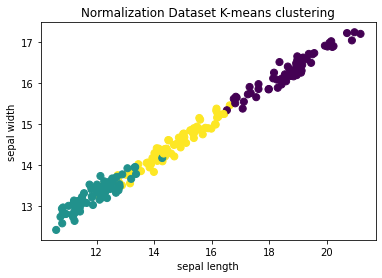

In [199]:
# plot data
import matplotlib.pyplot as plt

# initialize plot 1
plt.figure(1)
plt.scatter(D[:, 0], D[:, 1], c=kmeans.labels_, s=50, cmap='viridis')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.title('Normalization Dataset K-means clustering')

# initialize plot 2
# plt.figure(2)
# plt.scatter(df_scaled2[:, 0], df_scaled2[:, 1], c=label2, s=50, cmap='viridis')
# plt.xlabel('sepal length')
# plt.ylabel('sepal width')
# plt.title('UFT (MI Based) K-means clustering')

plt.show()